<a href="https://colab.research.google.com/github/suha98/Analysis-of-Amazon-Bestselling-Books-2009-2019/blob/main/Bestselling_Books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### About the Data

**Name:** Amazon top 50 Bestselling Books List from 2009 to 2019

The dataset was collected from [Kaggle](https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019). I manually added the Gender column and have uploaded my version of the data. 

In [1]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('bestsellers with categories.csv')

In [3]:
df

,Name,Author,User Rating,Reviews,Price,Year,Genre,Gender
0,Cutting for Stone,Abraham Verghese,4.6,4866,11,2010,Fiction,Male
1,Cutting for Stone,Abraham Verghese,4.6,4866,11,2011,Fiction,Male
2,Milk and Vine: Inspirational Quotes From Class...,Adam Gasiewski,4.4,3113,6,2017,Non Fiction,Male
3,Go the F**k to Sleep,Adam Mansbach,4.8,9568,9,2011,Fiction,Male
4,What Should Danny Do? (The Power to Choose Ser...,Adir Levy,4.8,8170,13,2019,Fiction,Male
...,...,...,...,...,...,...,...,...
545,Player's Handbook (Dungeons & Dragons),Wizards RPG Team,4.8,16990,27,2017,Fiction,Company
546,Player's Handbook (Dungeons & Dragons),Wizards RPG Team,4.8,16990,27,2018,Fiction,Company
547,Player's Handbook (Dungeons & Dragons),Wizards RPG Team,4.8,16990,27,2019,Fiction,Company
548,Divine Soul Mind Body Healing and Transmission...,Zhi Gang Sha,4.6,37,6,2009,Non Fiction,Male


In [4]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
Gender         0
dtype: int64

In [5]:
print(df['Genre'].unique())
print(df['Year'].unique())

['Fiction' 'Non Fiction']
[2010 2011 2017 2019 2016 2009 2014 2013 2012 2015 2018]


## Possible Analyses

1. Distribution of Male and Female authors in ten years
2. Distribution of Fiction and Non-Fiction Works in 10 Years
3. Correlation between number of reviews and price according to males and females - does more reviews mean higher price?
5. Distribution of Gender and Number of Reviews
6. Distribution of review ratings according to year
7. Does a book name with more words mean higher rating/reviews/price? Is it on the bestseller list for longer?
8. Books that have been on the bestselling list more than once and their characteristics. Did the price go up? Are most of these books fiction or non-fiction? Were most of the writers male or female?



## Calculations

Calculating the percentage of male and female bestselling authors

In [7]:
#Making a subset of the dataframe by grouping the rows by gender
df_gender = pd.DataFrame(df.groupby(['Year', 'Gender']).size().reset_index())

#converts the wide-form data to longform
df_gender= df_gender.pivot(index=['Year'], columns=['Gender'], values=0)

#creating the column for percentages
df_gender['female %'] = (df_gender['Female']/50)*100
df_gender['male %'] = (df_gender['Male']/50)*100


df_gender

Gender,Company,Female,Male,female %,male %
Year,,,,,
2009,2,16,32,32.0,64.0
2010,3,11,36,22.0,72.0
2011,3,16,31,32.0,62.0
2012,3,19,28,38.0,56.0
2013,4,14,32,28.0,64.0
2014,8,13,29,26.0,58.0
2015,8,17,25,34.0,50.0
2016,7,24,19,48.0,38.0
2017,5,16,29,32.0,58.0


## Visualizations

##### **Distribution of Male and Female authors over time**

Comments:
1. The percentage of bestselling male authors was approximately double the percentage of bestselling females authors in 2009
2. The only year that there were more bestselling female authors was in 2016
3. The disparity had been decreasing over the years. In 2019, there are 5% more male authors than females which is far smaller than the 35% in 2009

```
# This is formatted as code
```




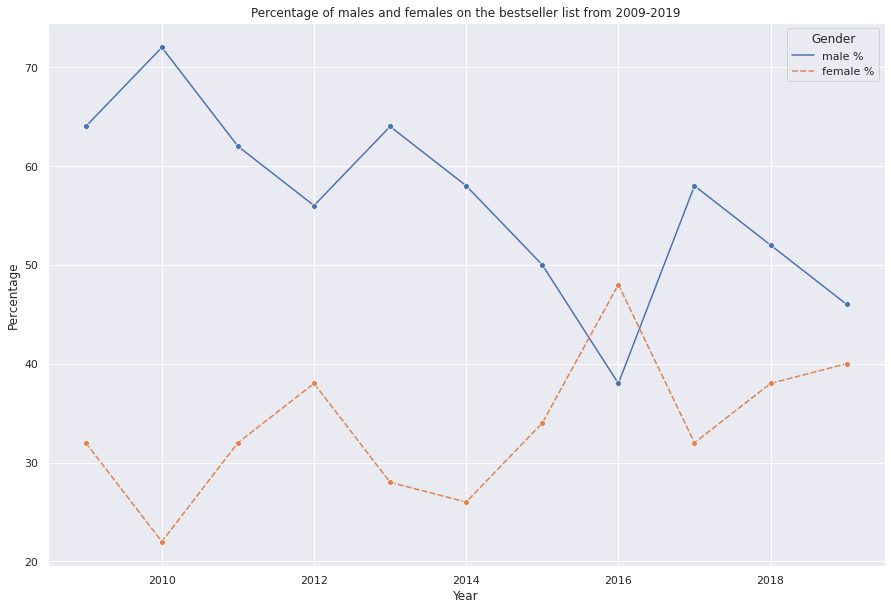

In [53]:
sns.set_theme()
plt.figure(figsize=(15,10))
plt.title('Percentage of males and females on the bestseller list from 2009-2019')
plt.xlabel('Year')
plt.ylabel('Percentage')
sns.lineplot(data = df_gender[['male %', 'female %']], marker = 'o')

##### **Number of fiction/non-fiction books by gender over time**

Comments: 
- There were more non-fiction books than fiction in most years
- The number of male non-fiction writers decreased
- The number of female non-fiction writers increased
- Books with company authors were mostly non-fiction
- The number of male fiction writers remained relatively constant whereas the number of females decreased

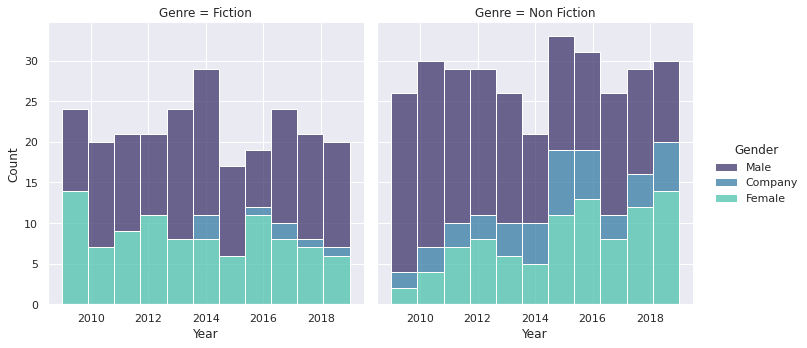

In [52]:
sns.set_theme()
sns.displot(df, x="Year", hue = 'Gender', palette = 'mako', multiple = 'stack',col = 'Genre')


##### **User Rating of Amazon Bestselling Books over time**

With time, it appears that books with a higher user rating became bestsellers.

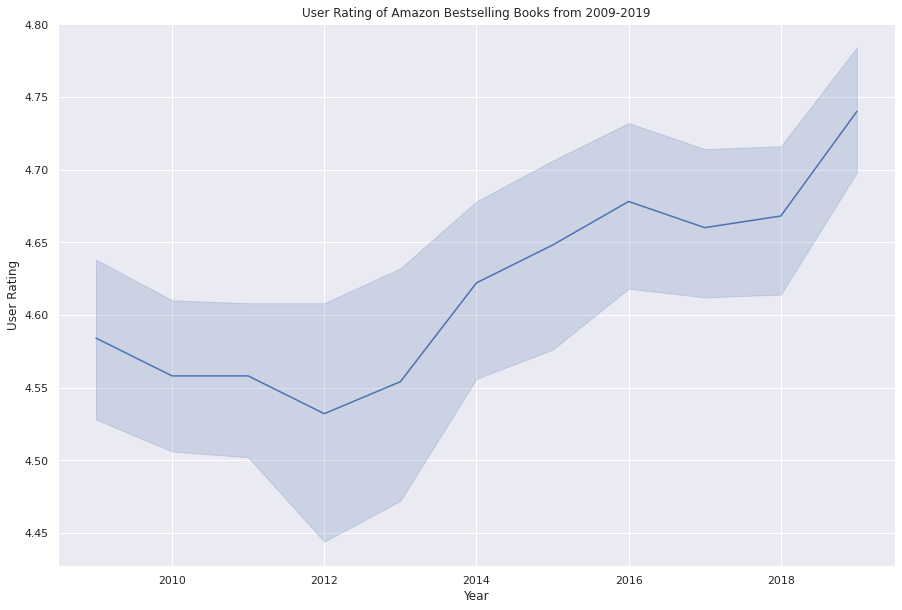

In [54]:
sns.set_theme()
plt.figure(figsize=(15,10))
plt.title('User Rating of Amazon Bestselling Books from 2009-2019')
plt.xlabel('Year')
plt.ylabel('User Rating')
sns.lineplot(data=df, x="Year", y='User Rating')



In [ ]:
#df_gender['Year'] = df_gender['Year'].astype(str)

